# **DATASET ANSCOMBE**

El conjunto de datos de Anscombe (Anscombe's Quartet) es un famoso conjunto de datos que fue creado por el estadístico británico Francis Anscombe en 1973. El conjunto de datos consiste en cuatro grupos de datos (I, II, III y IV), cada uno con las mismas propiedades estadísticas básicas, pero con distribuciones y relaciones visuales muy diferentes cuando se grafican.

### **Carga del Dataset**

In [26]:
!unzip /content/df_anscombe.zip -d /content/

unzip:  cannot find or open /content/df_anscombe.zip, /content/df_anscombe.zip.zip or /content/df_anscombe.zip.ZIP.


In [27]:
import pandas as pd

df = pd.read_csv('/content/df_anscombe.csv')

### **Resumen Estadístico**

In [28]:
df.groupby("group").describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

* El mismo valor medio (mean) de x y de y.
* La misma varianza (variance) de x y de y.
* La misma correlación lineal entre x y y.
* La misma ecuación de regresión lineal (y = mx + c).

In [29]:
df.head()

,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1


### **Gráficas de Cada Grupo**

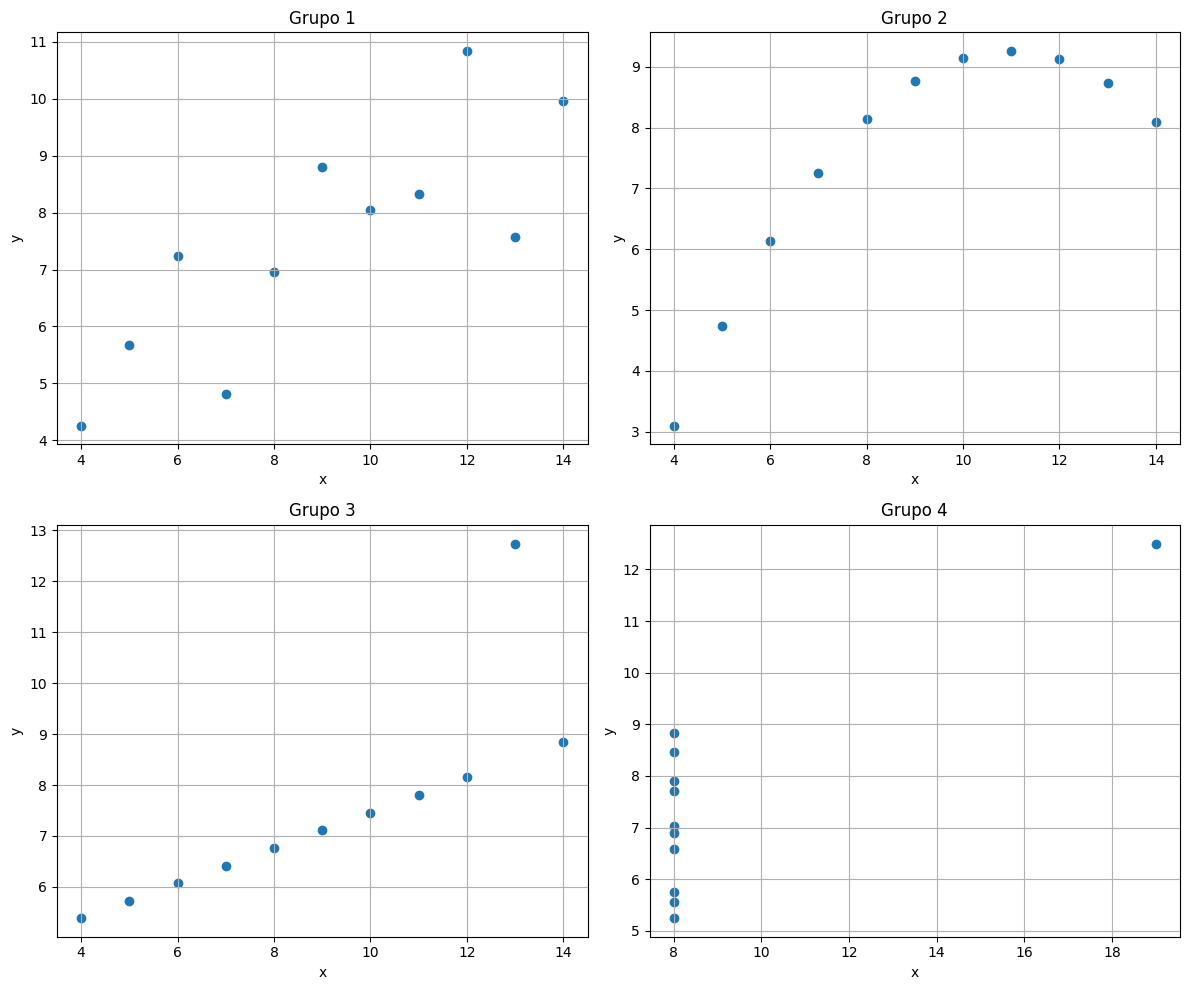

In [30]:
import matplotlib.pyplot as plt

# Crear subplots con 4 gráficos (uno para cada grupo)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Lista de ejes para facilitar el acceso
ax_list = axs.ravel()

# Graficar cada grupo en su propio subplot
for i, group in enumerate(df['group'].unique()):
    group_data = df[df['group'] == group]
    ax = ax_list[i]
    ax.scatter(group_data['x'], group_data['y'])
    ax.set_title(f'Grupo {group}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

A pesar de tener estos valores estadísticos idénticos, cada uno de los conjuntos de datos tiene una distribución visual muy diferente, lo que resalta la importancia de no depender únicamente de estadísticas descriptivas para analizar datos y, en cambio, visualizar las relaciones entre variables.

### **Gráfica de Dispersión de x vs y para Todos los Grupos con Línea de Regresión**

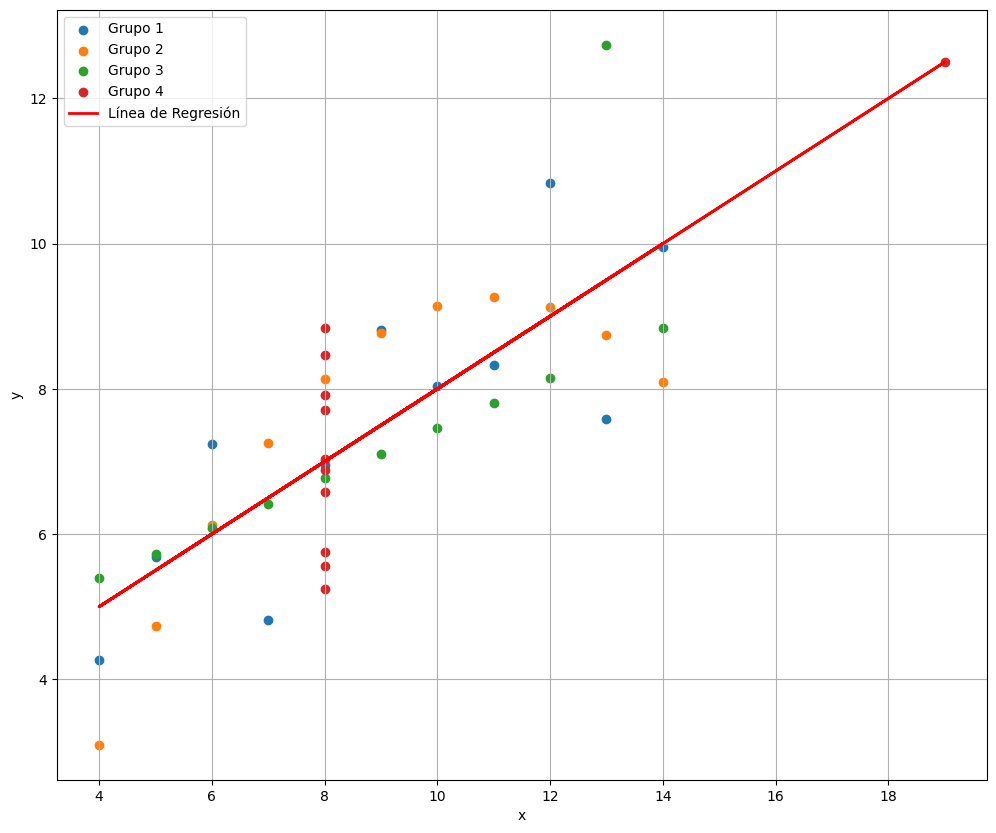

In [31]:
from sklearn.linear_model import LinearRegression

# Crear una sola gráfica de dispersión con todos los grupos
plt.figure(figsize=(12, 10))

# Graficar cada grupo en el mismo gráfico
for group in df['group'].unique():
    group_data = df[df['group'] == group]
    plt.scatter(group_data['x'], group_data['y'], label=f'Grupo {group}')

# Calcular la regresión lineal usando todos los puntos de los grupos
X = df['x'].values.reshape(-1, 1)  # Variable independiente
Y = df['y'].values  # Variable dependiente

# Crear el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, Y)

# Predicciones del modelo
y_pred = regression_model.predict(X)

# Dibujar la línea de regresión en la gráfica
plt.plot(df['x'], y_pred, color='red', linewidth=2, label='Línea de Regresión')

# Configurar el gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


### **Diagrama de Cajas y Bigotes por Grupo**

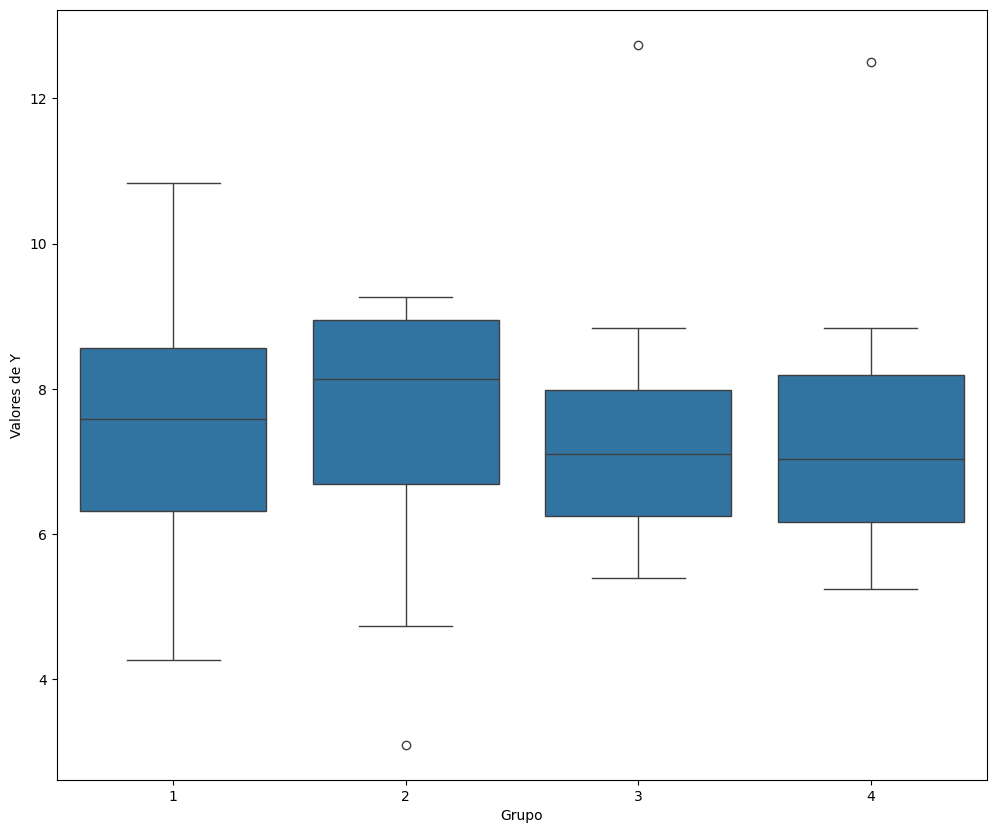

In [32]:
import seaborn as sns

# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(12, 10))
sns.boxplot(x='group', y='y', data=df)

# Personalizar el gráfico
plt.xlabel('Grupo')
plt.ylabel('Valores de Y')

# Mostrar el gráfico
plt.show()

### **Conclusión**

El cuarteto de Anscombe es un excelente ejemplo de la necesidad de visualizar los datos, ya que los valores estadísticos como la media, la varianza y la correlación no cuentan toda la historia de la distribución de los datos.

Si se tiene que hacer un análisis de datos o se tiene que trabajar con datos estadísticos, es importante siempre visualizar los datos además de calcular las estadísticas, para evitar llegar a conclusiones erróneas basadas únicamente en números.